In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [3]:
house_data_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
print(house_data_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
house_data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house_data_train.shape

(1460, 81)

In [6]:
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Check the test data set 

In [7]:
house_data_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
house_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
house_data_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
catag = house_data_train.dtypes[house_data_train.dtypes=="object"].index
print(catag)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [10]:
house_data_train[catag].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


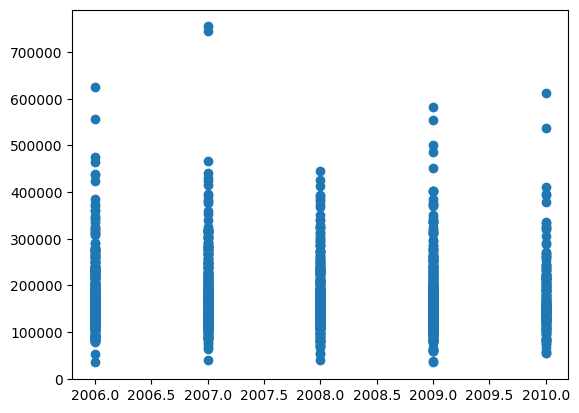

In [11]:
plt.scatter(house_data_train["YrSold"],house_data_train["SalePrice"] ) 

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

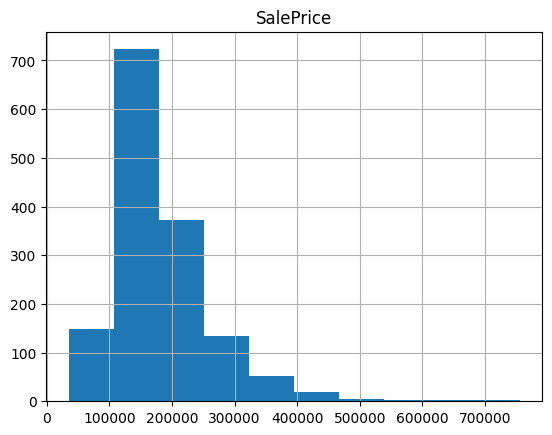

In [12]:
house_data_train.hist(column="SalePrice")

<Axes: >

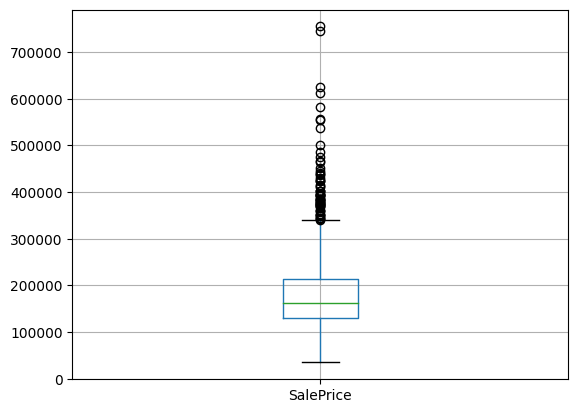

In [13]:
house_data_train.boxplot(column="SalePrice")

<Axes: xlabel='YrSold', ylabel='SalePrice'>

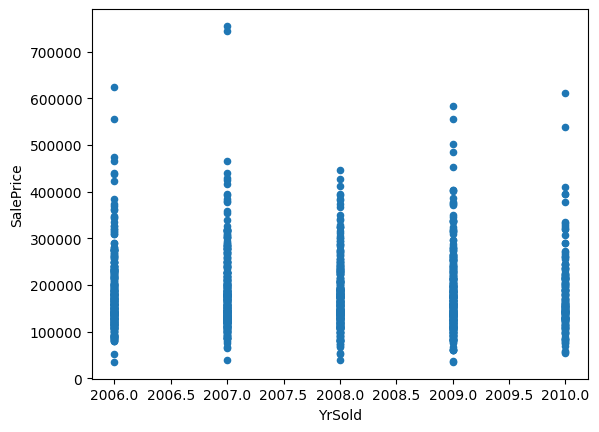

In [14]:
house_data_train.plot(kind="scatter",
                     x="YrSold",
                     y="SalePrice")

In [15]:
#missing = np.where(house_data_train["Age"].isnull()==True)

In [16]:
house_data_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sales price is about 18000.
The min is 34900 and max is 75500. 

Now we measure the skewness, whcih measure the shapre of the data. 

Skew is 0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

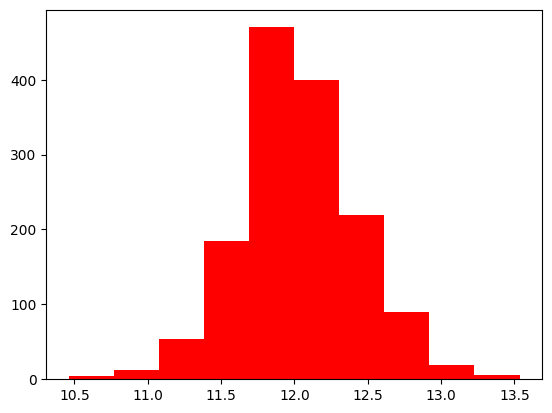

In [17]:
data_log = np.log(house_data_train["SalePrice"])
print("Skew is",data_log.skew()  )
plt.hist(data_log, color="red")

In [18]:
data_numeric = house_data_train.select_dtypes(include=[np.number])
print(data_numeric.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


Use correlation method to find the coreelationship between the variables. 

In [19]:
corr = data_numeric.corr()
print(corr["SalePrice"].sort_values(ascending=False)[:5],'/n')
print(corr["SalePrice"].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 /n
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The most correalted to the sales prices is overall quality. 
check the uniquness of the data.

In [20]:
data_numeric["OverallQual"].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

The quality ranges from 1-10. 

Use pivot table to understand the relationship between the overall quality and sales price. 

In [21]:
quality_pivot = house_data_train.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot

/tmp/ipykernel_33/860785014.py:1: FutureWarning: The provided callable <function median at 0x7e44e5713c70> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  quality_pivot = house_data_train.pivot_table(index='OverallQual',


,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108000.0
5,133000.0
6,160000.0
7,200141.0
8,269750.0
9,345000.0


<Axes: xlabel='OverallQual'>

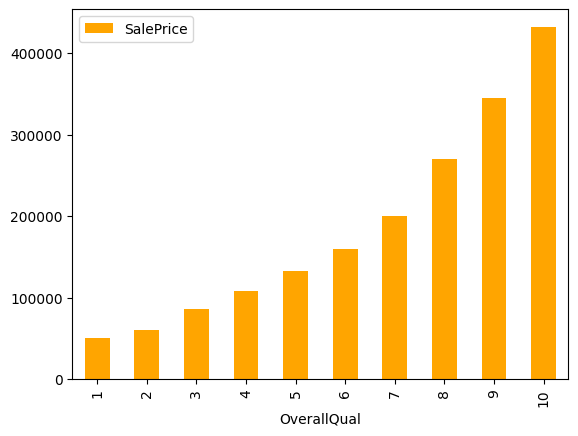

In [22]:
quality_pivot.plot(kind="bar",
                     color="orange")

Check the relationship between GrLivArea and sales price. 

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

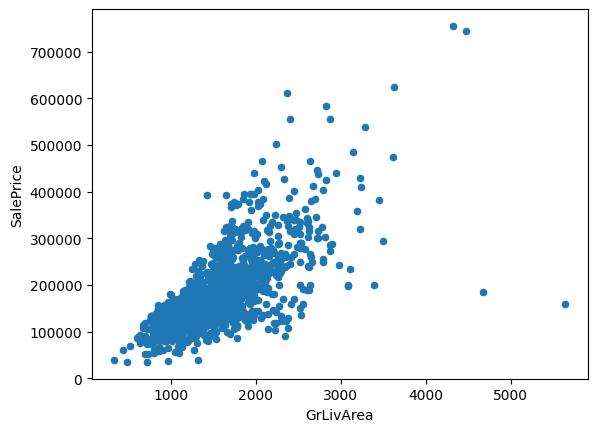

In [23]:
house_data_train.plot(kind="scatter",
                     x="GrLivArea",
                     y="SalePrice")

Check the relationship between GarageCars and sales price.

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

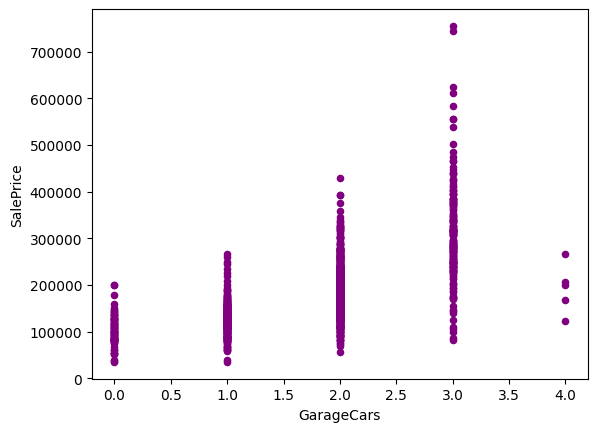

In [24]:
house_data_train.plot(kind="scatter",
                     x="GarageCars",
                     y="SalePrice", color="purple")

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

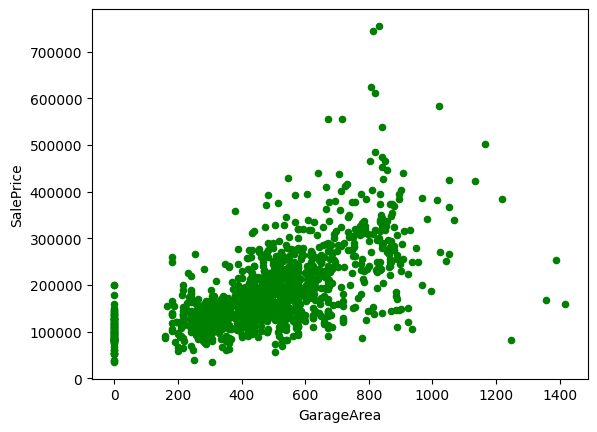

In [25]:
house_data_train.plot(kind="scatter",
                     x="GarageArea",
                     y="SalePrice", color="green")


<Axes: >

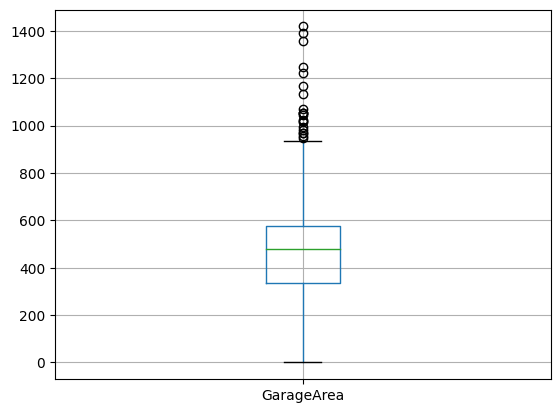

In [26]:
house_data_train.boxplot("GarageArea")

Remove the outliers 

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

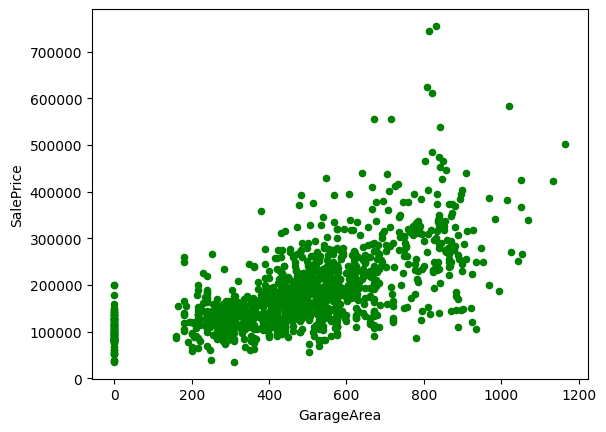

In [27]:

house_data_train= house_data_train[house_data_train['GarageArea'] < 1200]
#house_data_train['GarageArea']= pd.Categorical[data_withoutoutliers]
#print(data_withoutoutlier.head(5))
house_data_train.plot(kind="scatter",
                     x="GarageArea",
                     y="SalePrice", color="green")


**Check the null values**

In [28]:
nulls = pd.DataFrame(house_data_train.isnull().sum().sort_values(ascending=False)[:25]) 
nulls.columns = ['Null Count'] 
nulls.index.name = 'Feature' 
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
MasVnrType,871
FireplaceQu,689
LotFrontage,258
GarageYrBlt,81
GarageCond,81


Examine the variable MiscFeature uisng unique() function.

In [29]:
print(house_data_train.MiscFeature.unique())

[nan 'Shed' 'Gar2' 'Othr' 'TenC']


MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Consider non numeric features. 

In [30]:
catag = house_data_train.select_dtypes(exclude=[np.number])
catag.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


/tmp/ipykernel_33/1509493891.py:1: FutureWarning: The provided callable <function median at 0x7e44e5713c70> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  salescon_pivot = house_data_train.pivot_table(index='SaleCondition',


<Axes: xlabel='SaleCondition'>

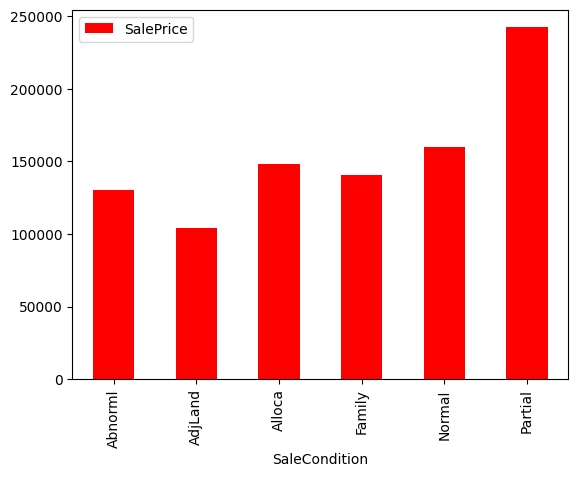

In [31]:
salescon_pivot = house_data_train.pivot_table(index='SaleCondition',
                  values='SalePrice', aggfunc=np.median)
salescon_pivot.plot(kind="bar", color="red")

Partial slaes condition has the higest sales price. 

3. Bulding the model.

Linear regression 

In [32]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(house_data_train["OverallQual"]), 
                     y = house_data_train["SalePrice"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

-98374.92141149449
[45798.55283582]


We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:

In [33]:
regression_model.score(X = pd.DataFrame(house_data_train["OverallQual"]), 
                     y = house_data_train["SalePrice"])


0.6286568035353668

In [34]:
train_prediction = regression_model.predict(X = pd.DataFrame(house_data_train["OverallQual"]))
# Actual - prediction = residuals
residuals = house_data_train["OverallQual"] - train_prediction

residuals.describe()

count      1455.000000
mean    -180817.032990
std       62897.835448
min     -359600.606947
25%     -222207.948439
50%     -176410.395603
75%     -130612.842768
max       52577.368576
Name: OverallQual, dtype: float64

In [35]:
data = house_data_train.select_dtypes(include=[np.number]).interpolate().dropna()

In [36]:
y = np.log(house_data_train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [38]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
model= regression_model.fit(X = X_train, 
                     y = y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

9.809309313377117
[-4.34011000e-04  7.66411349e-05  1.79710346e-06  7.64800884e-02
  5.04619656e-02  3.14198694e-03  1.26292172e-03 -2.14522111e-05
  7.43936326e-05  4.20730711e-05 -2.11184289e-06  1.14354861e-04
  5.18577242e-05  5.77126362e-05  1.57744997e-05  1.25344860e-04
  2.06674462e-02 -1.39167942e-02  2.55577164e-02  2.50185582e-02
 -1.13280822e-02 -5.27147750e-02  2.25624417e-02  5.01258117e-02
 -2.48426978e-04  3.09114597e-02  1.62101759e-04  7.51884873e-05
 -6.96160487e-05  2.04067426e-04  1.88977191e-04  3.10820416e-04
  1.76646598e-04 -1.93590074e-05 -1.50070211e-04 -3.71271831e-03]


In [39]:
regression_model.score(X = X_train, 
                     y = y_train)

0.8900085972693912

The coefficient of determination, or 
R
2
, is a measure that provides information about the goodness of fit of a model. 

In [40]:
from sklearn.metrics import r2_score 
#r2 = r2_score(X_train, y_train) 

train_prediction = regression_model.predict(X = X_train)

# Actual - prediction = residuals
residuals = y_train - train_prediction

residuals.describe()

count    9.740000e+02
mean    -2.303428e-15
std      1.319067e-01
min     -1.549791e+00
25%     -6.042728e-02
50%      1.332777e-03
75%      6.961721e-02
max      4.660116e-01
Name: SalePrice, dtype: float64

In [41]:
SSResiduals = (residuals**2).sum()

SSTotal = ((y_train - y_train.mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.8900085972693912

This means feature is exaplined by 0.8. 

ext, we'll consider rmse. 

In [42]:
predictions = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

0.0181970575424996

The RMSE measures the distance between our predicted values and actual values.

Text(0.5, 1.0, 'Linear Regression Model')

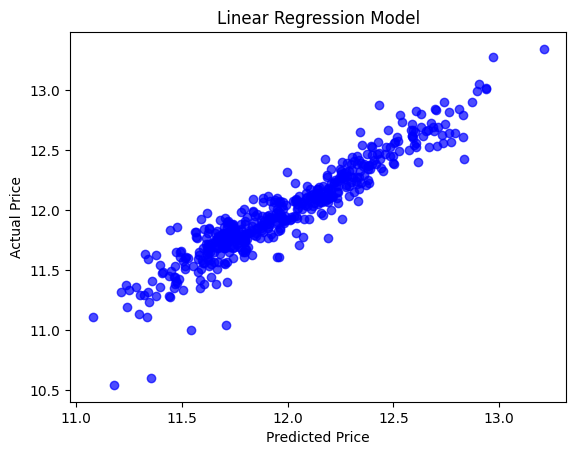

In [45]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')